In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import numpy as np
states = np.load('rook_final.npy').item()

In [12]:
def get_deterministic_policy(states):
    pi = {}
    for state, value in states.items():
        pi[state] = list(value.keys())[0]
    return pi

In [17]:
def deterministic_policy_eval_step(states_actions, V, pi):
    # Evaluation in place (in contrast with evaluation with 2 arrays).
    # Needs less memory and converges too
    # pi is a dict and pi[s] is the best action for that state. (The most probable action)
    delta = 0
    for state, actions in states_actions.items():
        action = pi[state]
        next_node = actions[action]['next_state']
        reward = actions[action]['status']
        V_updated = 0
        if next_node in V:
            V_updated = -(reward + V[next_node])
        else:
            V_updated = -reward
        delta = max(delta, np.abs(V_updated - V[state]))
        V[state] = V_updated
    return V, delta

In [18]:
def policy_improve(V, states_actions):
    pi = {}
    for state, actions in states_actions.items():
        actions_list = [] # list(actions.keys())
        expected_rewards = [] #np.zeros(len(actions))
        for i, (action, data) in enumerate(actions.items()):
            actions_list.append(action)
            next_state = data['next_state']
            reward = data['status']
            if next_state in V:
                expected_rewards.append(-(reward + V[next_state]))
            else:
                expected_rewards.append(-reward)

        pi[state] = actions_list[np.argmax(expected_rewards)]
        if state == '4k3/8/4K2R/8/8/8/8/8 w':
            print(np.argmax(expected_rewards))
            print(actions_list)
            print(expected_rewards)
    return pi

In [19]:
def value_iteration(states):
    pi_old = get_deterministic_policy(states)
    initial_V = {state: 0 for state in states.keys()}

    policy_updates = 1
    while policy_updates >0:
        V, _ = deterministic_policy_eval_step(states, initial_V, pi_old)
        pi = policy_improve(V, states)

        policy_updates = 0
        for j, (state, accion) in enumerate(pi.items()):
            if accion != pi_old[state]:
                 policy_updates += 1
        pi_old = pi.copy()

        print('Number of differences of new policy vs old policy:', policy_updates)
        print('---------------------------')
    return pi_old, V

In [20]:
%time pi, V = value_iteration(states)

0
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Number of differences of new policy vs old policy: 1729
---------------------------
0
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Number of differences of new policy vs old policy: 3863
---------------------------
0
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Number of differences of new policy vs old policy: 7555
---------------------------
0
['h6h8', 'h6h7', 'h6g6', 'h6f6', 'h6h5', 'h6h4', 'h6h3', 'h6h2', 'h6h1', 'e6f6', 'e6d6', 'e6f5', 'e6e5', 'e6d5']
[1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
Number of differences of new policy vs old policy: 14863
---------------------------
0
['h6h8', 'h6h7', 'h6g6', 'h6f

In [29]:
# CPU times: user 1min 57s, sys: 3.06 s, total: 2min
# Wall time: 1min 57s
#np.save('chess_pi', pi)
#np.save('chess_V', V)

In [34]:
pi = np.load('chess_pi.npy').item()
V = np.load('chess_V.npy').item()

In [49]:
ties = []
for k, v in V.items():
    if k[-1] == 'b' and v==1:
        print('error')
    if k[-1] == 'w' and v==-1:
        print('error')
    if v == 0:
        ties.append(k)
len(ties)

22176

In [42]:
from IPython.display import display, HTML, clear_output
import time

In [35]:
V['8/8/8/8/8/8/R7/k1K5 b']

0

In [27]:
import chess

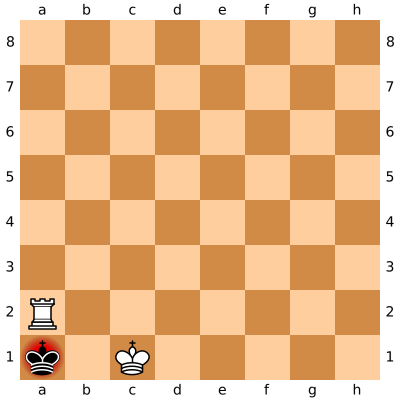

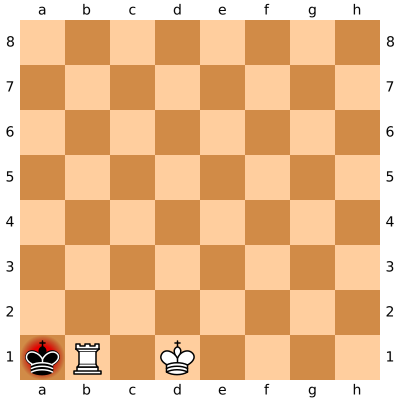

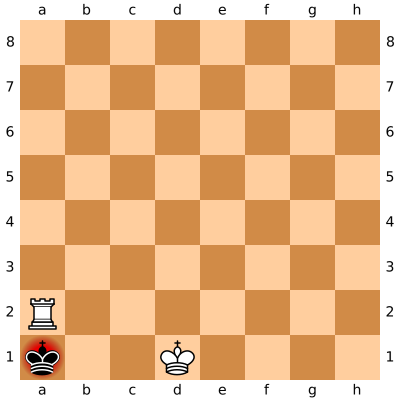

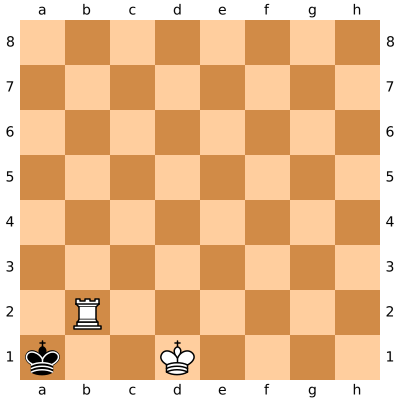

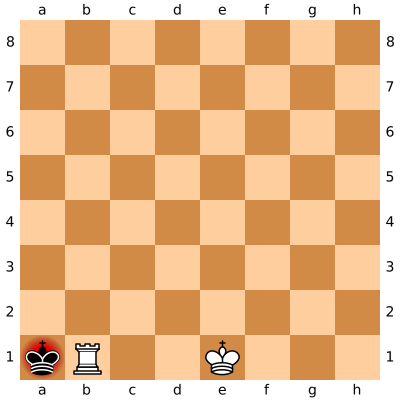

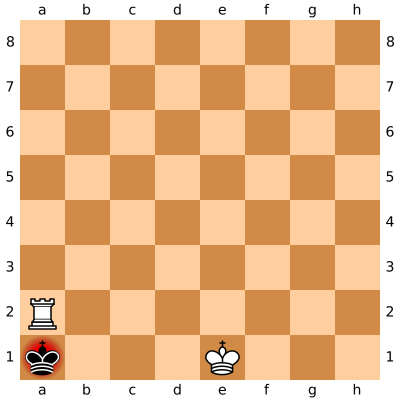

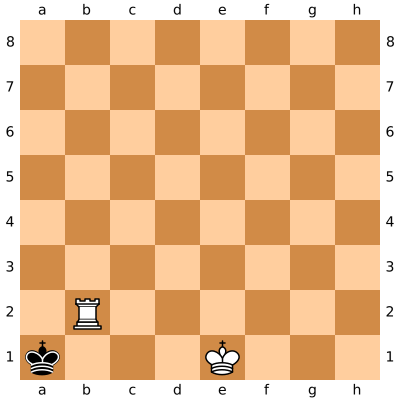

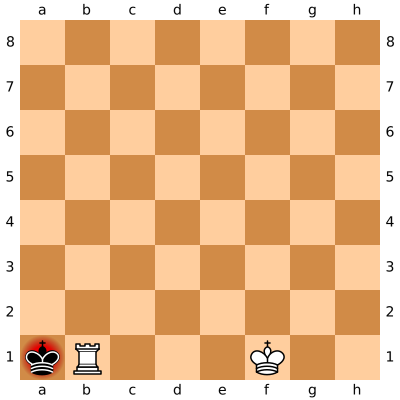

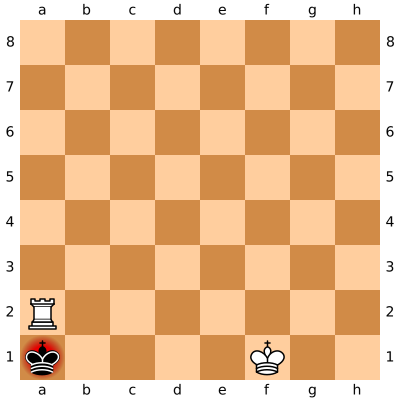

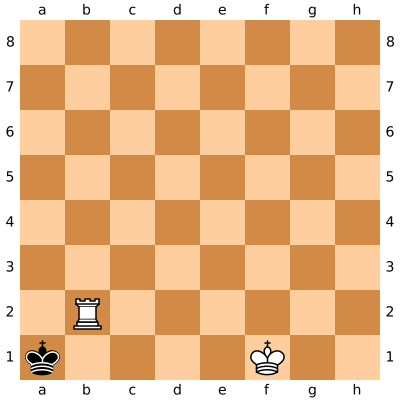

In [46]:
for t in ties[:10]:
    board = chess.Board()
    board.clear()
    board.set_fen(t + ' - - 0 1')
    display(board)